In [327]:
import pandas as pd
import json as js
import csv
import matplotlib.pyplot as plt
import numpy as np
import math as m
import seaborn as sns
# import scipy

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": "Times New Roman",
})

In [328]:
file_path = 'mtllm_lmql_dspy_comp.csv'
data = pd.read_csv(file_path)
data.set_index('Problem Name', inplace=True)


In [329]:
data_scrubbed = data.drop(columns=['Problem Description','Problem Focus','Desired Output','DSPy LoC', 'MTLLM LoC']).rename(columns={'DSPy Jac LoC':'DSPy'
                                                                                                                                 ,'MTLLM w/o SemStr LoC':'MTLLM'})

In [330]:
LoC = data_scrubbed[['DSPy','LMQL','MTLLM']]
LoC_M = data_scrubbed[['Number of Line Modifeid Lines - LMQL','Number of Line Modifeid Lines - DSPY','Number of Lines Modified - MTLLM']]
LoC_M = LoC_M.rename(columns={'Number of Line Modifeid Lines - LMQL':'LMQL','Number of Line Modifeid Lines - DSPY':'DSPy','Number of Lines Modified - MTLLM':'MTLLM'})

In [331]:
# fig, ax = plt.subplots(figsize=(10, 4))

# LoC.plot(kind='bar', colormap='RdYlGn', edgecolor='black', linewidth=1.0, fontsize=14, ax=ax)
# #     axes[i].legend().remove()
# ax.set_xticklabels(LoC.index.tolist(), rotation=45, ha='right')
# #     axes[i].grid(axis='y',linestyle='--', linewidth=0.5)
# #     axes[i].set_ylim(0,65)
# ax.set_ylabel(r'\textbf{Lines of Code}', fontsize=14)
# ax.set_xlabel('')
# ax.legend(fontsize=14, loc='upper center', shadow=True, bbox_to_anchor=(0.5, 1.3), ncol=3)
# ax.grid(axis='y',linestyle='--', linewidth=0.5)
# # legends = data['Essay Evaluator'].T.keys()
# # legends = [legend.replace('Total ', '') for legend in legends]
# # # fig.legend(legends, loc='upper center',shadow=True, fontsize=14, bbox_to_anchor=(0.5, 1.13), ncol=2)
# # # fig.text(0.5, -0.15, r'\textbf{LLM Programming Framework}', ha='center', va='center',fontsize=12)
# # fig.text(0.07, 0.5, r'\textbf{Success Rate}($\%$)', ha='center', va='center', rotation='vertical', fontsize=14)
# plt.savefig('LoC.png', dpi=300, bbox_inches='tight')
# plt.show()


In [332]:
# fig, ax = plt.subplots(figsize=(10, 4))

# LoC_M.plot(kind='bar', colormap='RdYlGn', edgecolor='black', linewidth=1.0, fontsize=14, ax=ax)
# #     axes[i].legend().remove()
# ax.set_xticklabels(LoC_M.index.tolist(), rotation=45, ha='right')
# #     axes[i].grid(axis='y',linestyle='--', linewidth=0.5)
# #     axes[i].set_ylim(0,65)
# ax.set_ylabel(r'\textbf{Lines of Code Modified}', fontsize=14)
# ax.set_xlabel('')
# ax.legend(fontsize=14, loc='upper center', shadow=True, bbox_to_anchor=(0.5, 1.2), ncol=3)
# ax.grid(axis='y',linestyle='--', linewidth=0.5)
# ax.set_ylim(0, 40)
# # legends = data['Essay Evaluator'].T.keys()
# # legends = [legend.replace('Total ', '') for legend in legends]
# # # fig.legend(legends, loc='upper center',shadow=True, fontsize=14, bbox_to_anchor=(0.5, 1.13), ncol=2)
# # # fig.text(0.5, -0.15, r'\textbf{LLM Programming Framework}', ha='center', va='center',fontsize=12)
# # fig.text(0.07, 0.5, r'\textbf{Success Rate}($\%$)', ha='center', va='center', rotation='vertical', fontsize=14)
# # plt.savefig('LoC_modified.png', dpi=300, bbox_inches='tight')
# plt.show()

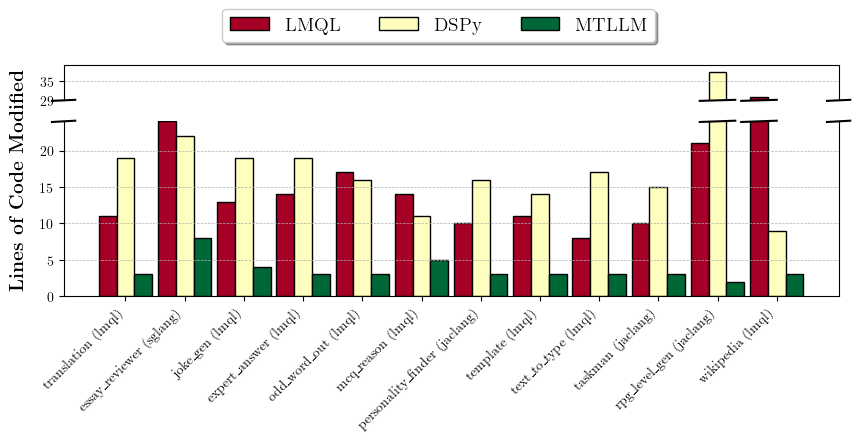

In [333]:
# Define the data for the three groups
XX1 = LoC_M['LMQL']
XX2 = LoC_M['DSPy']
XX3 = LoC_M['MTLLM']

# Plot settings
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(10, 3), gridspec_kw={'height_ratios': [1, 5]})
ax1.spines['bottom'].set_visible(False)
ax1.tick_params(axis='x', which='both', bottom=False)
ax2.spines['top'].set_visible(False)

bs = 24
ts = 29

ax2.set_ylim(0, bs)
ax1.set_ylim(ts, 40)
ax1.set_yticks(np.arange(29, 40, 6))

# Bar width and positions
bar_width = 0.3
indices = np.arange(len(XX1))

colormap1 = plt.cm.RdYlGn
edgecolor = 'black'

# Plot the bars
bars1_1 = ax1.bar(indices - bar_width, XX1.values, bar_width, color = colormap1(0.0), edgecolor='black', linewidth=1.0)
bars2_1 = ax2.bar(indices - bar_width, XX1.values, bar_width, color = colormap1(0.0), edgecolor='black', linewidth=1.0)

bars1_2 = ax1.bar(indices, XX2.values, bar_width, color = colormap1(0.5), edgecolor='black', linewidth=1.0)
bars2_2 = ax2.bar(indices, XX2.values, bar_width, color = colormap1(0.5), edgecolor='black', linewidth=1.0)

bars1_3 = ax1.bar(indices + bar_width, XX3.values, bar_width, color = colormap1(1.0), edgecolor='black', linewidth=1.0)
bars2_3 = ax2.bar(indices + bar_width, XX3.values, bar_width, color = colormap1(1.0), edgecolor='black', linewidth=1.0)

ax2.set_xticks(indices)
ax2.set_xticklabels(XX1.index)

for tick in ax2.get_xticklabels():
    tick.set_rotation(0)

fig.legend(['LMQL','DSPy','MTLLM'],fontsize=14, loc='upper center', shadow=True, bbox_to_anchor=(0.5, 1.1), ncol=3)
ax2.set_xticklabels(LoC_M.index.tolist(), rotation=45, ha='right')

d = 0.015  
kwargs = dict(transform=ax1.transAxes, color='k', clip_on=False)
ax1.plot((-d, +d), (-d, +d), **kwargs)      
ax1.plot((1 - d, 1 + d), (-d, +d), **kwargs)
kwargs.update(transform=ax2.transAxes)  
ax2.plot((-d, +d), (1 - d/4, 1 + d/4), **kwargs)  
ax2.plot((1 - d, 1 + d), (1 - d/4, 1 + d/4), **kwargs)

for bars1, bars2 in zip([bars1_1, bars1_2, bars1_3], [bars2_1, bars2_2, bars2_3]):
    for b1, b2 in zip(bars1, bars2):
        posx = b2.get_x() + b2.get_width() / 2.
        if b2.get_height() > bs:
            ax2.plot((posx - 20 * d, posx + 20 * d), (1 - d/4, 1 + d/4), color='k', clip_on=False,
                     transform=ax2.get_xaxis_transform())
        if b1.get_height() > ts:
            ax1.plot((posx - 20 * d, posx + 20 * d), (-d, +d), color='k', clip_on=False,
                     transform=ax1.get_xaxis_transform())
ax1.grid(axis='y',linestyle='--', linewidth=0.5)
ax2.grid(axis='y',linestyle='--', linewidth=0.5)

fig.text(0.08, 0.5, r'\textbf{Lines of Code Modified}', ha='center', va='center', rotation='vertical', fontsize=14)
plt.savefig('LoC_modified.png', dpi=300, bbox_inches='tight')
plt.show()


In [334]:
# LoC_reduction_DSPy = pd.DataFrame([])
# LoC_reduction_DSPy['LMQL'] = LoC['DSPy'] - LoC['LMQL']
# LoC_reduction_DSPy['MTLLM'] = LoC['DSPy'] - LoC['MTLLM']
# LoC_reduction_DSPy = LoC_reduction_DSPy.div(LoC['DSPy'], axis=0) * 100
# LoC_reduction_LMQL = pd.DataFrame([])
# LoC_reduction_LMQL['DSPy'] = LoC['LMQL'] - LoC['DSPy']
# LoC_reduction_LMQL['MTLLM'] = LoC['LMQL'] - LoC['MTLLM']
# LoC_reduction_LMQL = LoC_reduction_LMQL.div(LoC['LMQL'], axis=0) * 100

In [335]:
LoC_reduction = pd.DataFrame([])
LoC_reduction['MTLLM Vs. DSPy'] = (LoC['DSPy'] - LoC['MTLLM']).div(LoC['DSPy'], axis=0) * 100
LoC_reduction['MTLLM Vs. LMQL'] = (LoC['LMQL'] - LoC['MTLLM']).div(LoC['LMQL'], axis=0) * 100


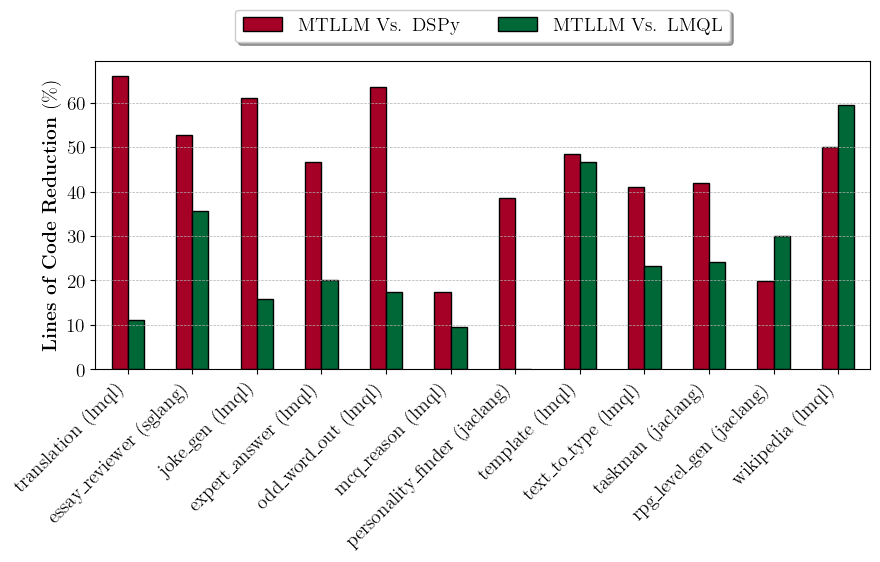

In [336]:
fig, ax = plt.subplots(figsize=(10, 4))

LoC_reduction.plot(kind='bar', colormap='RdYlGn', edgecolor='black', linewidth=1.0, fontsize=14, ax=ax)
#     axes[i].legend().remove()
ax.set_xticklabels(LoC_reduction.index.tolist(), rotation=45, ha='right')
#     axes[i].grid(axis='y',linestyle='--', linewidth=0.5)
#     axes[i].set_ylim(0,65)
ax.set_ylabel(r'\textbf{Lines of Code Reduction} ($\%$)', fontsize=14)
ax.set_xlabel('')
ax.legend(fontsize=14, loc='upper center', shadow=True, bbox_to_anchor=(0.5, 1.2), ncol=3)
ax.grid(axis='y',linestyle='--', linewidth=0.5)
yticks = ax.get_yticks()
# ytick_labels = [r'\textbf{DSPy}' if tick == 0 else tick for tick in yticks]
# ax.set_yticklabels(ytick_labels)
# legends = data['Essay Evaluator'].T.keys()
# legends = [legend.replace('Total ', '') for legend in legends]
# # fig.legend(legends, loc='upper center',shadow=True, fontsize=14, bbox_to_anchor=(0.5, 1.13), ncol=2)
# # fig.text(0.5, -0.15, r'\textbf{LLM Programming Framework}', ha='center', va='center',fontsize=12)
# fig.text(0.07, 0.5, r'\textbf{Success Rate}($\%$)', ha='center', va='center', rotation='vertical', fontsize=14)
plt.savefig('LoC_Reduction.png', dpi=300, bbox_inches='tight')
plt.show()

In [337]:
# fig, ax = plt.subplots(figsize=(10, 4))

# LoC_reduction_DSPy.plot(kind='bar', colormap='RdYlGn', edgecolor='black', linewidth=1.0, fontsize=14, ax=ax)
# #     axes[i].legend().remove()
# ax.set_xticklabels(LoC_reduction_DSPy.index.tolist(), rotation=45, ha='right')
# #     axes[i].grid(axis='y',linestyle='--', linewidth=0.5)
# #     axes[i].set_ylim(0,65)
# ax.set_ylabel(r'\textbf{Lines of Code Reduction} ($\%$)', fontsize=14)
# ax.set_xlabel('')
# ax.legend(fontsize=14, loc='upper center', shadow=True, bbox_to_anchor=(0.5, 1.2), ncol=3)
# ax.grid(axis='y',linestyle='--', linewidth=0.5)
# yticks = ax.get_yticks()
# ytick_labels = [r'\textbf{DSPy}' if tick == 0 else tick for tick in yticks]
# ax.set_yticklabels(ytick_labels)
# # legends = data['Essay Evaluator'].T.keys()
# # legends = [legend.replace('Total ', '') for legend in legends]
# # # fig.legend(legends, loc='upper center',shadow=True, fontsize=14, bbox_to_anchor=(0.5, 1.13), ncol=2)
# # # fig.text(0.5, -0.15, r'\textbf{LLM Programming Framework}', ha='center', va='center',fontsize=12)
# # fig.text(0.07, 0.5, r'\textbf{Success Rate}($\%$)', ha='center', va='center', rotation='vertical', fontsize=14)
# plt.savefig('LoC_Reduction_vs_dspy.png', dpi=300, bbox_inches='tight')
# plt.show()

In [338]:
# fig, ax = plt.subplots(figsize=(10, 4))

# LoC_reduction_LMQL.plot(kind='bar', colormap='RdYlGn', edgecolor='black', linewidth=1.0, fontsize=14, ax=ax)
# #     axes[i].legend().remove()
# ax.set_xticklabels(LoC_reduction_LMQL.index.tolist(), rotation=45, ha='right')
# #     axes[i].grid(axis='y',linestyle='--', linewidth=0.5)
# #     axes[i].set_ylim(0,65)
# ax.set_ylabel(r'\textbf{Lines of Code Reduction} ($\%$)', fontsize=14)
# ax.set_xlabel('')
# ax.legend(fontsize=14, loc='upper center', shadow=True, bbox_to_anchor=(0.5, 1.2), ncol=3)
# ax.grid(axis='y',linestyle='--', linewidth=0.5)
# yticks = ax.get_yticks()
# ytick_labels = [r'\textbf{LMQL}' if tick == 0 else tick for tick in yticks]
# ax.set_yticklabels(ytick_labels)
# # legends = data['Essay Evaluator'].T.keys()
# # legends = [legend.replace('Total ', '') for legend in legends]
# # # fig.legend(legends, loc='upper center',shadow=True, fontsize=14, bbox_to_anchor=(0.5, 1.13), ncol=2)
# # # fig.text(0.5, -0.15, r'\textbf{LLM Programming Framework}', ha='center', va='center',fontsize=12)
# # fig.text(0.07, 0.5, r'\textbf{Success Rate}($\%$)', ha='center', va='center', rotation='vertical', fontsize=14)
# plt.savefig('LoC_Reduction_vs_lmql.png', dpi=300, bbox_inches='tight')
# plt.show()